<a href="https://colab.research.google.com/github/yardenzaki/Titanic-EDA-and-ML-SKlearn/blob/main/Simple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression test

In [100]:
## impotrs
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt


In [101]:
#Y = 2*X + 3 with noise
x = np.linspace(1,3*np.pi,300)
y = np.sin(x)
noise = np.random.uniform(-0.25,0.25,300)
y += noise
f' {y.mean()}'

' 0.18227077684571863'

In [102]:
# splitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
df = pd.DataFrame()
df["X_train"]=X_train
df["X_test"]=pd.Series(X_test)
df["y_train"]=y_train
df["y_test"]=pd.Series(y_test)

X_test =X_test.reshape(-1,1)
X_train =X_train.reshape(-1,1)
y_test =y_test.reshape(-1,1)
y_train =y_train.reshape(-1,1)
df

,X_train,X_test,y_train,y_test
0,1.479001,6.719833,1.223890,0.407325
1,5.620948,8.494953,-0.772744,0.858382
2,1.929825,5.282830,0.912575,-0.922205
3,1.676236,1.253589,1.029718,0.908325
4,7.057951,7.565128,0.910288,1.132818
...,...,...,...,...
265,6.297185,NaN,0.158607,NaN
266,3.000533,NaN,-0.089613,NaN
267,3.986711,NaN,-0.830341,NaN
268,8.607659,NaN,0.959695,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


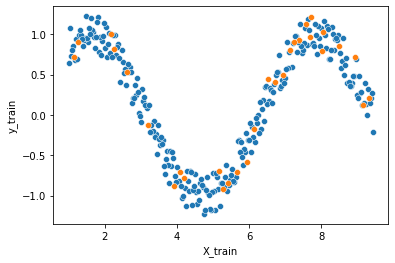

In [103]:
sns.scatterplot(df["X_train"],df["y_train"],data=df)
sns.scatterplot(df["X_test"],df["y_test"],data=df)


In [104]:
#Normalizing  using pipelime and StandardScaler (could use StandardScaler only... )
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train_pipe = Pipeline([('scaler', StandardScaler())]) ##Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.
X_test_pipe = Pipeline([('scaler', StandardScaler())]) ##Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works.

X_train_preprocessed = X_train_pipe.fit_transform(X_train)
X_test_preprocessed = X_test_pipe.fit_transform(X_test)

#print(X_train_preprocessed)


In [105]:
# defining the linear regression model
from sklearn.linear_model import LinearRegression
lr =LinearRegression()


In [106]:
#fit
lr.fit(X_train,y_train) # train

LinearRegression()

In [107]:
# Weights and bias
lr.coef_


array([[0.01046992]])

In [108]:
lr.intercept_

array([0.11676238])

In [109]:
# predict:
from sklearn.metrics import mean_squared_error

y_hat = lr.predict(X_test)
df["y_hat"] = pd.Series(y_hat.flatten())
df

,X_train,X_test,y_train,y_test,y_hat
0,1.479001,6.719833,1.223890,0.407325,0.187118
1,5.620948,8.494953,-0.772744,0.858382,0.205704
2,1.929825,5.282830,0.912575,-0.922205,0.172073
3,1.676236,1.253589,1.029718,0.908325,0.129887
4,7.057951,7.565128,0.910288,1.132818,0.195969
...,...,...,...,...,...
265,6.297185,NaN,0.158607,NaN,NaN
266,3.000533,NaN,-0.089613,NaN,NaN
267,3.986711,NaN,-0.830341,NaN,NaN
268,8.607659,NaN,0.959695,NaN,NaN


In [110]:
# get prediction error 
mse = mean_squared_error(y_test, y_hat)
print(y_train.mean())
rmse = np.sqrt(mse)
rmse 

0.17060471846135533


0.7179725761054857

In [111]:
# cross val score
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error'

scores = cross_val_score(lr, X_train, y_train, scoring=scoring, cv=10)
# You can use `metrics.SCORERS.keys()` to display the metrics scoring that you can use.

from sklearn import metrics
print(metrics.SCORERS.keys())
scores = -scores # The returned scores are negative. Let's make it positive.

print(scores)
scores.mean()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

0.7143781956395321

In [112]:
from sklearn.model_selection import cross_val_predict

y_hat = cross_val_predict(lr, X_train, y_train, cv=30)
df["y_hat_CV"] = y_hat
# get prediction error 
mse = mean_squared_error(y_train, y_hat)
print(y_train.mean())
rmse = np.sqrt(mse)
rmse 

0.17060471846135533


0.7170099502211715

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_train   270 non-null    float64
 1   X_test    30 non-null     float64
 2   y_train   270 non-null    float64
 3   y_test    30 non-null     float64
 4   y_hat     30 non-null     float64
 5   y_hat_CV  270 non-null    float64
dtypes: float64(6)
memory usage: 12.8 KB


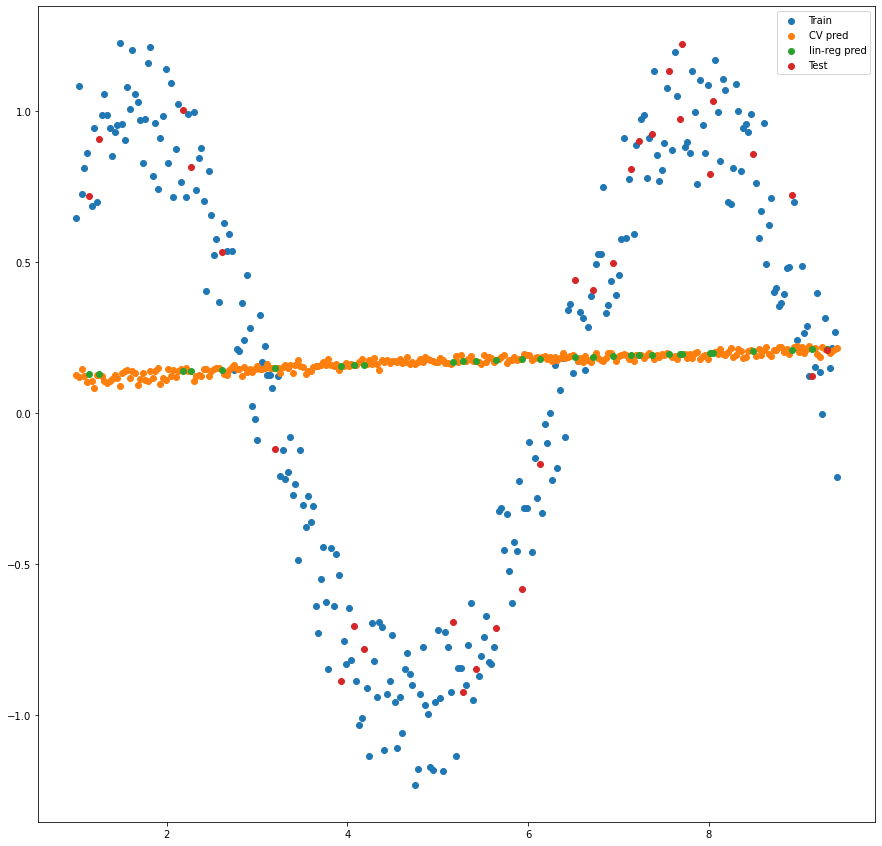

In [114]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(df["X_train"],df["y_train"],label = "Train")
plt.scatter(df["X_train"],df["y_hat_CV"],label = "CV pred" )

plt.scatter(df["X_test"],df["y_hat"],label = "lin-reg pred" )

plt.scatter(df["X_test"],df["y_test"],label ="Test")
plt.legend()
plt.show()


In [115]:
# Try regression with Random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1)

forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=42)

In [116]:
#Evaluate thr tree
from sklearn.metrics import mean_squared_error
y_val_forest = forest_reg.predict(X_train)
y_hat = forest_reg.predict(X_test)
df["y_hat_forest"]=pd.Series(y_hat)
df["y_val_forest"]=pd.Series(y_val_forest)
# print(y_hat)
# print(y_train)


mse = mean_squared_error(y_test,y_hat)
rmse = np.sqrt(mse)
rmse

0.19908020626753561

In [117]:

# improving forest
forest_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [118]:


from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators':[100,200,300,400,500],
    'max_leaf_nodes':list(range(0,20))}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=5)

grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18,
                                            19],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [119]:
grid_search.best_params_

{'max_leaf_nodes': 16, 'n_estimators': 100}

In [120]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_leaf_nodes=16, random_state=42)

In [121]:
forest_best = grid_search.best_estimator_
forest_best.score(X_test,y_test)

0.9400611445139918

In [122]:
y_hat = forest_best.predict(X_test)
df["forest_best"]= pd.Series(y_hat)
mse = mean_squared_error(y_test,y_hat)
rmse = np.sqrt(mse)
rmse




0.1748998375517267

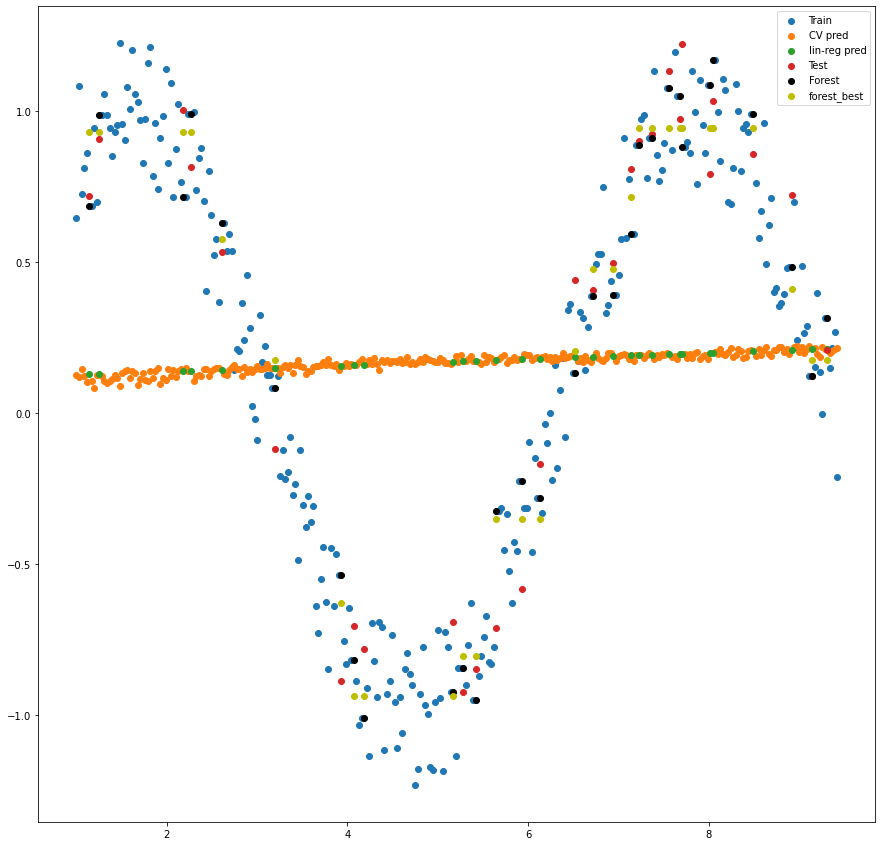

In [123]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(df["X_train"],df["y_train"],label = "Train")
plt.scatter(df["X_train"],df["y_hat_CV"],label = "CV pred" )

plt.scatter(df["X_test"],df["y_hat"],label = "lin-reg pred" )
#plt.scatter(df["X_train"],df["y_val_forest"],color='m',label ="validation Forest")

plt.scatter(df["X_test"],df["y_test"],label ="Test")
plt.scatter(df["X_test"],df["y_hat_forest"],color='k',label ="Forest")
plt.scatter(df["X_test"],df["forest_best"],color='y',label ="forest_best")
plt.legend()
plt.show()


## Summary
In this test I: 



1.   Pre-processed the data (Train-Test splits, Noralizing with StandardScalar using a Pipeline) 
2.   tried to eastimate a noisy sine function with:
  *  Linear Regression - As expected, under-fits non-linear function. 
  *   Random forests estimator - due to its nonlinear capabilities, and thanks to GridSearch CV (hyperparameters optimization) it was possible to get good enough predictions with a sufficient RMSE.






